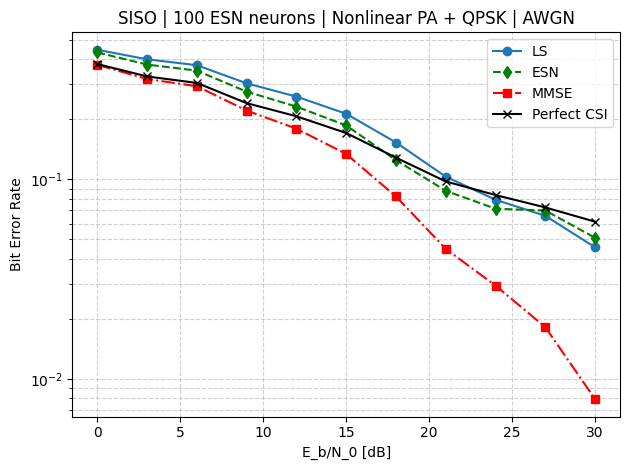

In [ ]:
# === Plot BER vs Eb/N0 (coded only, no ELM) ===
import pickle, os, numpy as np
import matplotlib.pyplot as plt

# Change if your file lives elsewhere
pkl_path = "BERvsEBNo_ESN_ELM_QPSK_awgn.pkl"

# ------------ helpers ------------
def _flatten(d, prefix=""):
    flat = {}
    if isinstance(d, dict):
        for k, v in d.items():
            kk = f"{prefix}.{k}" if prefix else str(k)
            if isinstance(v, dict):
                flat.update(_flatten(v, kk))
            else:
                flat[kk] = v
    else:
        flat["root"] = d
    return flat

def _is_num_1d(x):
    try:
        a = np.asarray(x)
        return np.issubdtype(a.dtype, np.number) and a.ndim == 1 and a.size > 1
    except Exception:
        return False

def find_ebn0(flat):
    # prefer Eb/N0 keys over SNR
    eb_candidates = []
    snr_candidates = []
    for k, v in flat.items():
        kl = k.lower()
        if not _is_num_1d(v):
            continue
        if any(tag in kl for tag in ["ebn0", "ebno", "eb_n0", "eb/n0"]):
            eb_candidates.append((k, np.asarray(v)))
        elif "snr" in kl:
            snr_candidates.append((k, np.asarray(v)))
    if eb_candidates:
        # pick the one with the longest length (usually all equal)
        eb_candidates.sort(key=lambda t: -len(t[1]))
        return eb_candidates[0][1], eb_candidates[0][0]
    if snr_candidates:
        snr_candidates.sort(key=lambda t: -len(t[1]))
        return snr_candidates[0][1], snr_candidates[0][0]
    raise KeyError("Could not find Eb/N0 or SNR array in the pickle.")

def pick_series(flat, ebno_len, method_syns):
    """Pick one BER series for a method (LS/ESN/MMSE/Perfect), avoiding ELM."""
    cands = []
    for k, v in flat.items():
        kl = k.lower()
        if not _is_num_1d(v): 
            continue
        if "elm" in kl: 
            continue
        if "ber" not in kl: 
            continue
        if any(ms in kl for ms in method_syns) and len(v) == ebno_len:
            cands.append((k, np.asarray(v)))
    if not cands:
        return None
    # Prefer keys that look like a clean name (shortest key as a heuristic)
    cands.sort(key=lambda t: (len(t[0]), t[0].lower()))
    return cands[0][1]

# ------------ load ------------
with open(pkl_path, "rb") as f:
    obj = pickle.load(f)

# allow DataFrame or dict or nested dict
if hasattr(obj, "to_dict"):
    obj = obj.to_dict(orient="list")

flat = _flatten(obj)

# x-axis
EbNoDB, eb_key = find_ebn0(flat)

# method synonyms (extend if your keys differ)
syn_LS      = ["ls", "least_squares"]
syn_ESN     = ["esn"]
syn_MMSE    = ["mmse"]
syn_Perfect = ["perfect", "perfect_csi", "genie", "oracle", "ideal", "true"]

BER_LS      = pick_series(flat, len(EbNoDB), syn_LS)
BER_ESN     = pick_series(flat, len(EbNoDB), syn_ESN)
BER_MMSE    = pick_series(flat, len(EbNoDB), syn_MMSE)
BER_Perfect = pick_series(flat, len(EbNoDB), syn_Perfect)

# Quick check so missing series don't crash the plot
def ok(x): return x is not None and len(x) == len(EbNoDB)

plt.figure()
if ok(BER_LS):
    plt.semilogy(EbNoDB, BER_LS, 'o-',  label='LS',           linewidth=1.5)
if ok(BER_ESN):
    plt.semilogy(EbNoDB, BER_ESN, 'gd--', label='ESN',          linewidth=1.5)
if ok(BER_MMSE):
    plt.semilogy(EbNoDB, BER_MMSE, 'rs-.', label='MMSE',         linewidth=1.5)
if ok(BER_Perfect):
    plt.semilogy(EbNoDB, BER_Perfect, 'kx-', label='Perfect CSI', linewidth=1.5)

plt.legend()
plt.grid(True, which="both", linestyle="--", alpha=0.6)
plt.title('SISO | 100 ESN neurons | Nonlinear PA + QPSK | AWGN')
plt.xlabel('E_b/N_0 [dB]')
plt.ylabel('Bit Error Rate')
plt.tight_layout()
plt.show()


In [ ]:
# === Plot BER vs Eb/N0 (coded only, no ELM) ===
import pickle, os, numpy as np
import matplotlib.pyplot as plt

# Change if your file lives elsewhere
pkl_path = "BERvsEBNo_ESN_ELM_QPSK_awgn.pkl"

# ------------ helpers ------------
def _flatten(d, prefix=""):
    flat = {}
    if isinstance(d, dict):
        for k, v in d.items():
            kk = f"{prefix}.{k}" if prefix else str(k)
            if isinstance(v, dict):
                flat.update(_flatten(v, kk))
            else:
                flat[kk] = v
    else:
        flat["root"] = d
    return flat

def _is_num_1d(x):
    try:
        a = np.asarray(x)
        return np.issubdtype(a.dtype, np.number) and a.ndim == 1 and a.size > 1
    except Exception:
        return False

def find_ebn0(flat):
    # prefer Eb/N0 keys over SNR
    eb_candidates = []
    snr_candidates = []
    for k, v in flat.items():
        kl = k.lower()
        if not _is_num_1d(v):
            continue
        if any(tag in kl for tag in ["ebn0", "ebno", "eb_n0", "eb/n0"]):
            eb_candidates.append((k, np.asarray(v)))
        elif "snr" in kl:
            snr_candidates.append((k, np.asarray(v)))
    if eb_candidates:
        # pick the one with the longest length (usually all equal)
        eb_candidates.sort(key=lambda t: -len(t[1]))
        return eb_candidates[0][1], eb_candidates[0][0]
    if snr_candidates:
        snr_candidates.sort(key=lambda t: -len(t[1]))
        return snr_candidates[0][1], snr_candidates[0][0]
    raise KeyError("Could not find Eb/N0 or SNR array in the pickle.")

def pick_series(flat, ebno_len, method_syns):
    """Pick one BER series for a method (LS/ESN/MMSE/Perfect), avoiding ELM."""
    cands = []
    for k, v in flat.items():
        kl = k.lower()
        if not _is_num_1d(v): 
            continue
        if "elm" in kl: 
            continue
        if "ber" not in kl: 
            continue
        if any(ms in kl for ms in method_syns) and len(v) == ebno_len:
            cands.append((k, np.asarray(v)))
    if not cands:
        return None
    # Prefer keys that look like a clean name (shortest key as a heuristic)
    cands.sort(key=lambda t: (len(t[0]), t[0].lower()))
    return cands[0][1]

# ------------ load ------------
with open(pkl_path, "rb") as f:
    obj = pickle.load(f)

# allow DataFrame or dict or nested dict
if hasattr(obj, "to_dict"):
    obj = obj.to_dict(orient="list")

flat = _flatten(obj)

# x-axis
EbNoDB, eb_key = find_ebn0(flat)

# method synonyms (extend if your keys differ)
syn_LS      = ["ls", "least_squares"]
syn_ESN     = ["esn"]
syn_MMSE    = ["mmse"]
syn_Perfect = ["perfect", "perfect_csi", "genie", "oracle", "ideal", "true"]

BER_LS      = pick_series(flat, len(EbNoDB), syn_LS)
BER_ESN     = pick_series(flat, len(EbNoDB), syn_ESN)
BER_MMSE    = pick_series(flat, len(EbNoDB), syn_MMSE)
BER_Perfect = pick_series(flat, len(EbNoDB), syn_Perfect)

# Quick check so missing series don't crash the plot
def ok(x): return x is not None and len(x) == len(EbNoDB)

plt.figure()
if ok(BER_LS):
    plt.semilogy(EbNoDB, BER_LS, 'o-',  label='LS',           linewidth=1.5)
if ok(BER_ESN):
    plt.semilogy(EbNoDB, BER_ESN, 'gd--', label='ESN',          linewidth=1.5)
if ok(BER_MMSE):
    plt.semilogy(EbNoDB, BER_MMSE, 'rs-.', label='MMSE',         linewidth=1.5)
if ok(BER_Perfect):
    plt.semilogy(EbNoDB, BER_Perfect, 'kx-', label='Perfect CSI', linewidth=1.5)

plt.legend()
plt.grid(True, which="both", linestyle="--", alpha=0.6)
plt.title('SISO | 100 ESN neurons | Nonlinear PA + QPSK | AWGN')
plt.xlabel('E_b/N_0 [dB]')
plt.ylabel('Bit Error Rate')
plt.tight_layout()
plt.show()


Meckey glass prediction

test error: 
0.13960390959901958


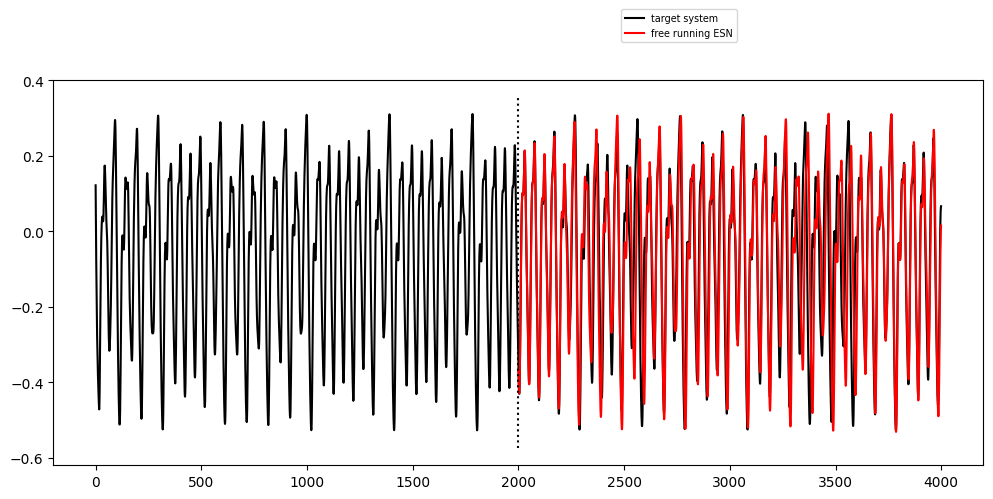

In [6]:
import numpy as np
from pyESN import ESN
from matplotlib import pyplot as plt
%matplotlib inline

data = np.load('mackey_glass_t17.npy') #  http://minds.jacobs-university.de/mantas/code
esn = ESN(n_inputs = 1,
          n_outputs = 1,
          n_reservoir = 500,
          spectral_radius = 1.5,
          random_state=42)

trainlen = 2000
future = 2000
pred_training = esn.fit(np.ones(trainlen),data[:trainlen])

prediction = esn.predict(np.ones(future))
print("test error: \n"+str(np.sqrt(np.mean((prediction.flatten() - data[trainlen:trainlen+future])**2))))

plt.figure(figsize=(12,5))
plt.plot(range(0,trainlen+future),data[0:trainlen+future],'k',label="target system")
plt.plot(range(trainlen,trainlen+future),prediction,'r', label="free running ESN")
lo,hi = plt.ylim()
plt.plot([trainlen,trainlen],[lo+np.spacing(1),hi-np.spacing(1)],'k:')
plt.legend(loc=(0.61,1.1),fontsize='x-small')